In [1]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
from antenna import Antenna
import itertools

In [10]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]

In [11]:
antenna_params['N'] = 10
antenna_params["wavelengths"] = [1, 1.3]

In [12]:
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
antenna.set_jacobian(weights=[1.0, 1.0])
antenna.set_hessian(weights=[1.0, 1.0])

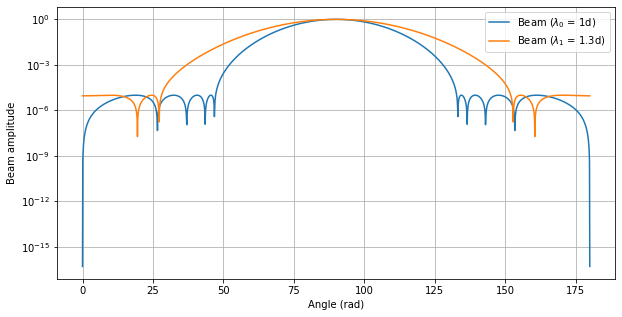

In [13]:
antenna.plot_ref_beams()

In [14]:
probe = None
e = 0
while e < 9:
    print(f" - eps value: {e}")
    antenna.set_allocation_constraint(e)
    _, probe = antenna.get_optimal_current_allocation(opt_params, x0=probe, cons=True, jac=True, hess=True)
    opt_params["options"] = {"maxiter": 1000, "verbose": 1, "initial_tr_radius": 1e6, "initial_barrier_parameter": 1e-6}
    # antenna.plot_current_distribution()
    # antenna.plot_formed_beams()
#     e = float(min(abs(antenna.M @ probe.reshape(-1, 1))))
    e += 0.3
    print(f" - Probe: {probe}")
print(antenna.objective(probe))
print(np.linalg.matrix_rank(antenna.hess(probe), tol=1e-6))

 - eps value: 0
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   1   |   0   | +1.7269e+06 | 1.00e+00 | 1.81e+05 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   2   |   1   | +6.9478e+05 | 7.00e+00 | 5.48e+04 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   3   |   7   | +2.5170e+05 | 7.89e+00 | 1.84e+04 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   4   |   4   |  13   | +9.0285e+04 | 1.39e+01 | 1.09e+04 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   5   |   5   |  18   | +3.1864e+04 | 1.39e+01 | 5.03e+03 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   6   |   6   |  22   | +1.0953e+04 | 1.39e+01 | 2.08e+03 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   7   |   7   |  26   | +3.6115e+03 | 1.39e+01 | 8.03e+02 | 0.00e+00 | 1.00e+00 |  1.00e-01   |   4   |
|   8   |   8   |  30   | +1.1

|  77   |  81   |  367  | +4.2032e-07 | 2.56e+00 | 4.35e-05 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  78   |  82   |  370  | +4.2022e-07 | 2.56e+00 | 9.49e-06 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  79   |  82   |  370  | +4.2022e-07 | 1.28e+01 | 1.22e-05 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   0   |
|  80   |  83   |  380  | +9.2673e-08 | 1.28e+01 | 8.92e-04 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   4   |
|  81   |  84   |  381  | +8.2292e-08 | 1.28e+01 | 2.60e-04 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   4   |
|  82   |  85   |  384  | +6.8079e-08 | 1.28e+01 | 3.41e-05 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   4   |
|  83   |  86   |  389  | +6.3176e-08 | 1.28e+01 | 5.48e-06 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   4   |
|  84   |  86   |  389  | +6.3176e-08 | 6.41e+01 | 5.37e-06 | 0.00e+00 | 1.00e+00 |  1.28e-06   |   0   |
|  85   |  87   |  396  | +3.9184e-08 | 6.41e+01 | 1.03e-04 | 0.00e+00 | 1.00e+00 |  1.28e-06   |   4   |
|  86   |  88   |  397  | +3.9097e-08 | 6.41e+

`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 29, CG iterations: 119, optimality: 6.85e-09, constraint violation: 0.00e+00, execution time:  6.8 s.

[array([ 1.01116095e-10, -3.77869977e-11, -1.18618019e-10,  1.06583337e-09,
       -2.10044207e-09, -1.89442411e-10,  7.85423848e-10, -2.23459179e-10,
       -1.37958700e-11,  1.00165873e-10])]

[[-11.32024081]
 [ -7.45703118]
 [ -5.07076861]
 [ -3.62501972]
 [ -2.93826641]
 [ -2.93964824]
 [ -3.62673938]
 [ -5.06883985]
 [ -7.45687522]
 [-11.32042922]]
 - Probe: [-5.66019546 -3.72846032 -2.53542553 -1.81251925 -1.46898071 -1.46998726
 -1.81332756 -2.53443748 -3.72840007 -5.660281   -5.66004535 -3.72857086
 -2.53534308 -1.81250047 -1.46928571 -1.46966098 -1.81341182 -2.53440236
 -3.72847516 -5.66014822]
 - eps value: 2.1
`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluations: 30, CG iterations: 149, optimality: 5.58e-09, constraint violation: 0.00e+00, executio

KeyboardInterrupt: 

In [ ]:
antenna.plot_current_distribution()
antenna.plot_formed_beams()